# Metrics Logger
Extracting data from pds.log to visualize the training and validation accuracies of all of the folds

## Importing Libraries
Primarily matplotlib and numpy, to help with graphing and visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Getting values
Getting all of the values from pds.log, and then returning them as arrays

In [63]:
def get_values(filepath):
    losses = []
    accs = []
    val_losses = []
    val_accs = []
    with open(filepath) as fp:
        line = fp.readline()
        while line:
            if "/step" in line:
                vals = get_metrics(line)
                accs.append(vals[0])
                losses.append(vals[1])
                val_losses.append(vals[2])
                val_accs.append(vals[3])
            line = fp.readline()

    return accs, losses, val_losses, val_accs

## Extracting from a single line
This function extracts all of the pertinent metrics from a single line at the end of the epoch

In [64]:
def get_metrics(line):
    vals = []
    metrics = ["acc:", "loss:", "val_loss:", "val_acc:"]
    for metric in metrics:
        index = line.index(metric) + len(metric) + 1
        val = line[index : index + 7]
        vals.append(val)
    return vals

## Graphing values
Graphing each individual metric with a reference array

In [98]:
def graph_metric(values, metric, fold):
    ref = []
    for i in range (1, 101):
        ref.append(i)
    ref_np = np.array(ref).astype(np.float)
    values_np = np.array(values).astype(np.float)
    plt.figure()
    plt.scatter(ref_np, values_np)
    plt.title(metric + ": Fold " + str(int(fold)))
    plt.xlabel("Epoch")
    plt.ylabel(metric)

## Running all functions
Loads in all of the data, and plots them for each fold

In [99]:
def run_vals():
    accs, losses, val_losses, val_accs = get_values('pds.log')
    for a in range(0, 901, 100):
        graph_metric(accs[a: a + 100], "Accuracy", a / 100 + 1)
        graph_metric(losses[a: a + 100], "Losses", a / 100 + 1)
        graph_metric(val_accs[a: a + 100], "Validation Accuracy", a / 100 + 1)
        graph_metric(val_losses[a: a + 100], "Validation Losses", a / 100 + 1)

### Running function
Final run!

<ipython-input-98-7fdb053c7ba2>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ref_np = np.array(ref).astype(np.float)
<ipython-input-98-7fdb053c7ba2>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  values_np = np.array(values).astype(np.float)
<ipython-input-98-7fdb053c7ba2>:7: RuntimeWarning: More than 20 figures have been opened. Fi

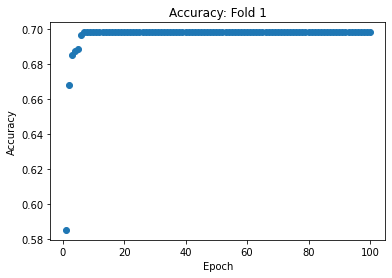

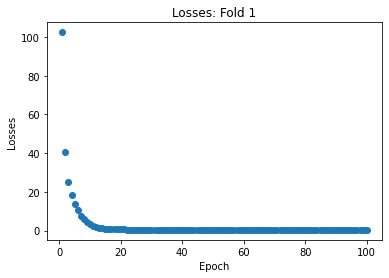

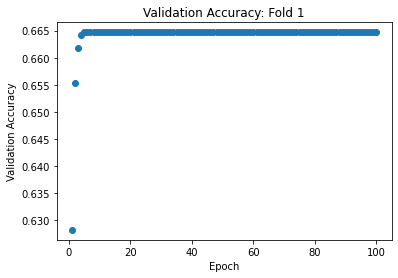

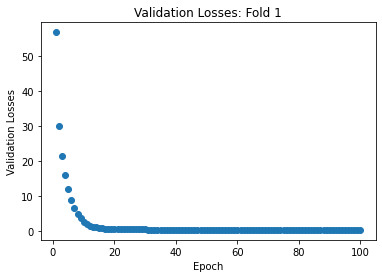

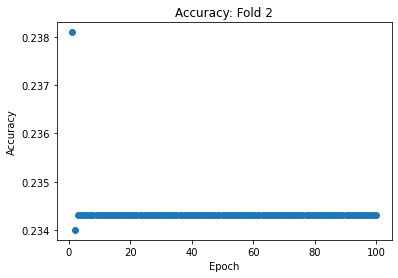

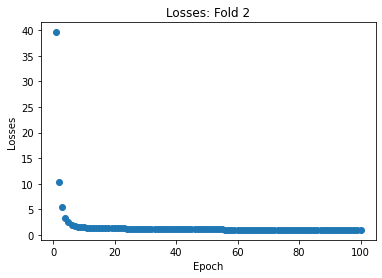

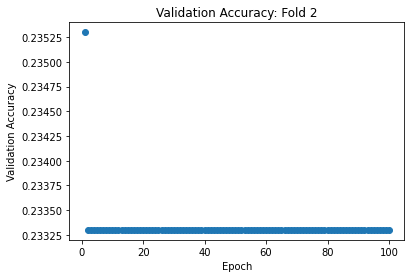

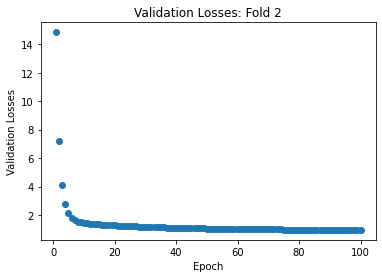

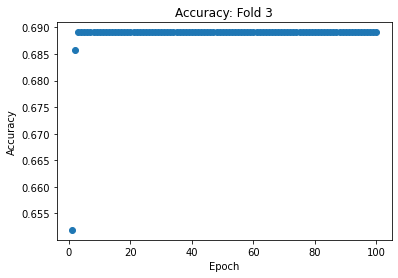

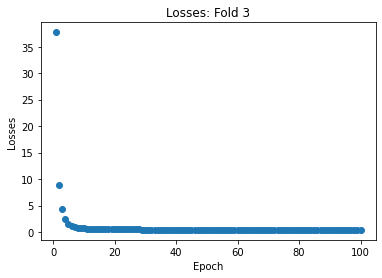

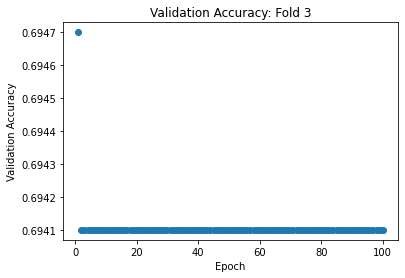

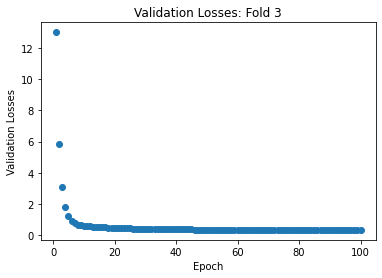

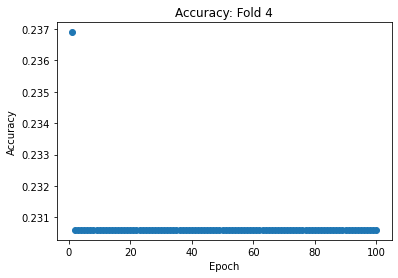

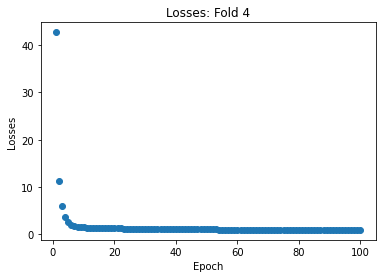

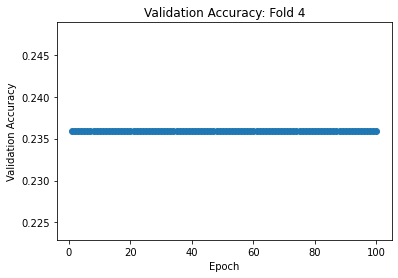

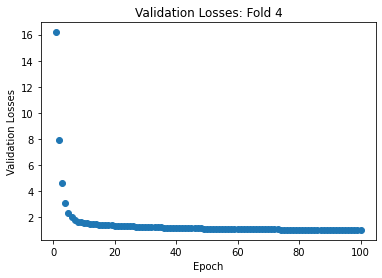

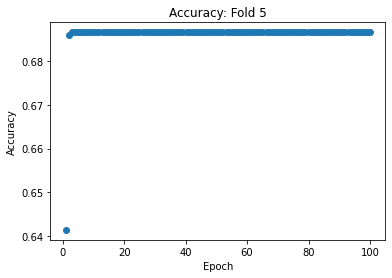

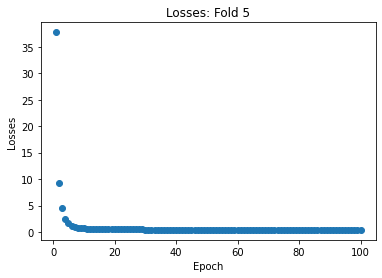

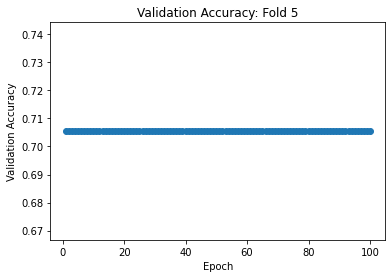

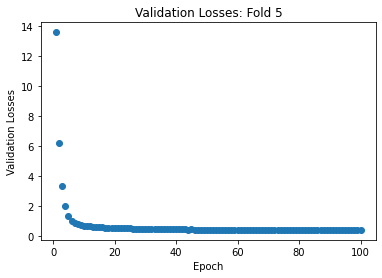

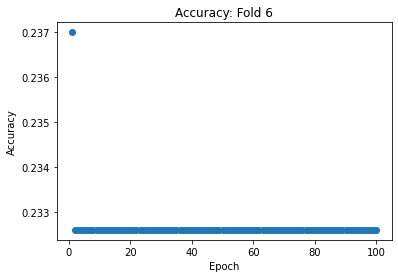

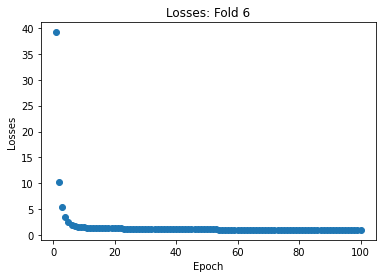

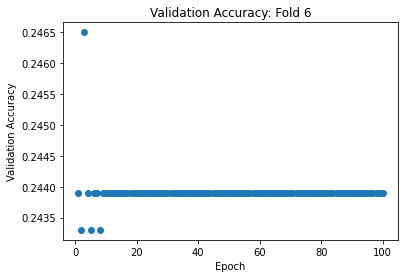

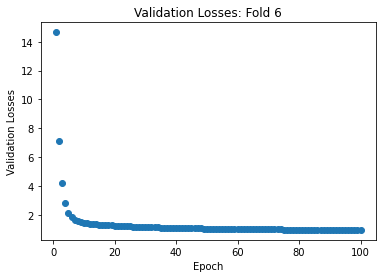

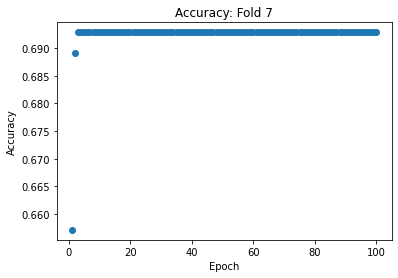

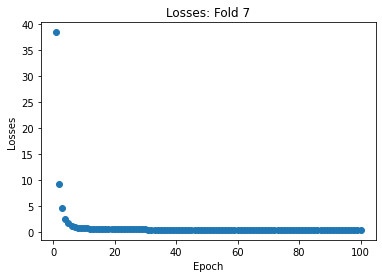

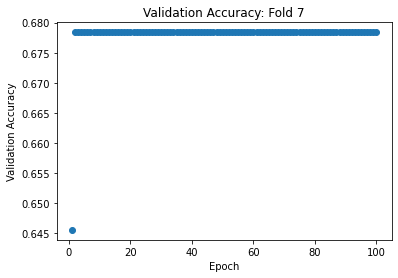

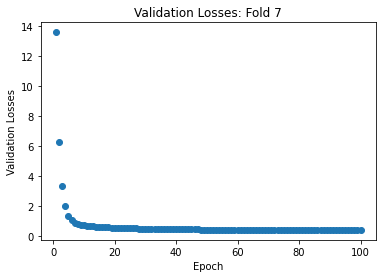

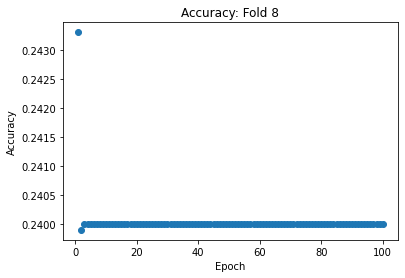

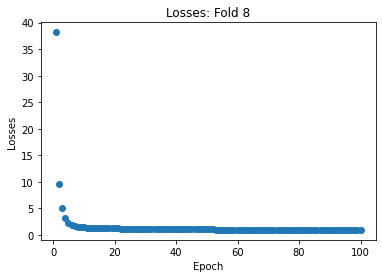

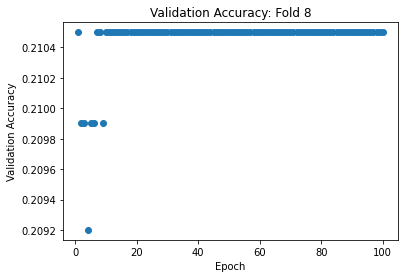

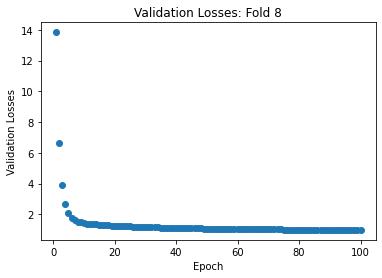

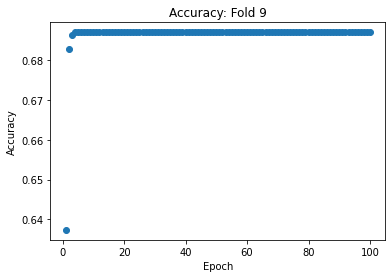

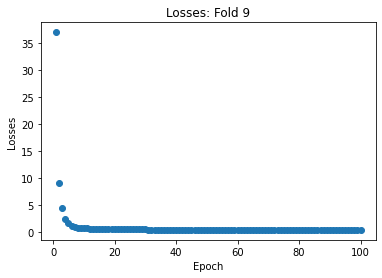

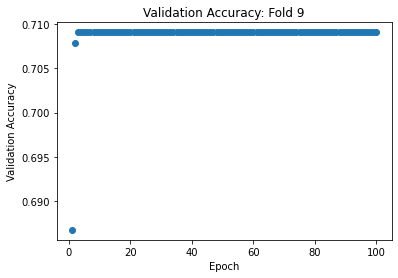

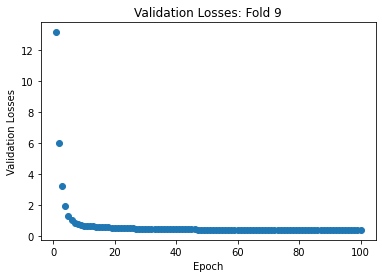

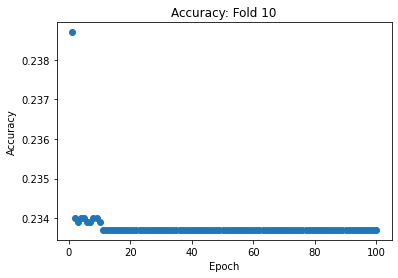

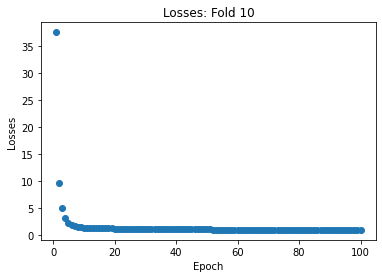

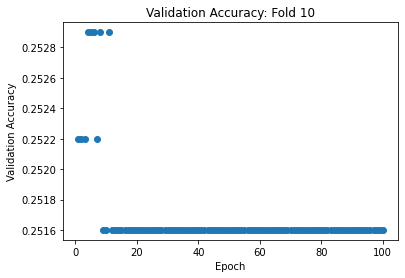

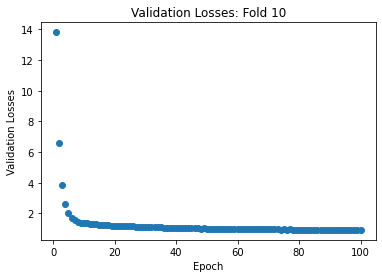

In [100]:
run_vals()